<a href="https://colab.research.google.com/github/Lanzero225/Python-Notebooks/blob/main/Philippine%20Weather/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Philippine Weather Analysis (2025)

The Philippines is a tropical country located in Southeast Asia, situated near the equator and along the western Pacific Ocean. Due to its geographic location, the country experiences highly variable weather conditions and is frequently affected by tropical storms and typhoons.

This analysis aims to examine historical weather data from the past two years across different locations in the Philippines. By analyzing key weather variables such as temperature, weather conditions, and other attributes, this study seeks to identify patterns, seasonal trends, and extreme weather occurrences. The insights derived from this analysis may help in understanding the country’s weather behavior and its implications for disaster preparedness, urban planning, and climate-related decision-making.



# Data Importing

To begin first, I will import the necessary libraries to begin this analysis.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset used for this analysis uses a dataset from Kaggle:
- https://www.kaggle.com/datasets/bwandowando/philippine-major-cities-weather-data-2025

The data here is gathered from:
- https://openweathermap.org

The 2025 dataset gathers records in 1-hour intervals.

First, let us begin by loading the dataset. I uploaded the dataset to my personal repository for easy access, which can be accessed with:
- "https://raw.githubusercontent.com/Lanzero225/Python-Notebooks/main/Philippine%20Weather/Data/{YYYY-MM}_CombinedData.csv"

After which, the csv file will be converted into a DataFrame and aggregated into a singular DataFrame.

In [21]:

directories = pd.period_range('2025-01', '2025-12', freq='M').strftime('%Y%m').tolist()
dfs = []

for i in directories:
    url = (
        "https://raw.githubusercontent.com/"
        "Lanzero225/Python-Notebooks/main/"
        f"Philippine%20Weather/Data/{i}_CombinedData.csv"
    )
    dfs.append(pd.read_csv(url))

weather_dataframe = pd.concat(dfs, ignore_index=True)


Looking initially into the code, we see that there are columns with missing values and mismatched datatypes.

Missing Columns:
- visibility
- wing.gust
- rain.1h

Datatype Mismatch:
- datetime
- sys.sunrise
- sys.sunset

In [22]:
weather_dataframe.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   visibility           1065372 non-null  float64
 1   datetime             1066627 non-null  object 
 2   main.temp            1066627 non-null  float64
 3   main.feels_like      1066627 non-null  float64
 4   main.temp_min        1066627 non-null  float64
 5   main.temp_max        1066627 non-null  float64
 6   main.pressure        1066627 non-null  float64
 7   main.humidity        1066627 non-null  float64
 8   main.sea_level       1066627 non-null  float64
 9   main.grnd_level      1066627 non-null  float64
 10  wind.speed           1066627 non-null  float64
 11  wind.deg             1066627 non-null  float64
 12  wind.gust            900218 non-null   float64
 13  clouds.all           1066627 non-null  float64
 14  sys.sunrise          1066627 non-null  object 
 15

In [23]:
weather_dataframe.head()

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
0,10000.0,2025-01-01 00:06:01+08:00,26.33,26.33,26.33,26.33,1011.0,80.0,1011.0,1005.0,3.48,131.0,5.79,85.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,overcast clouds,Alaminos,NaN
1,10000.0,2025-01-01 00:06:02+08:00,26.25,26.25,26.25,26.25,1012.0,83.0,1012.0,994.0,1.03,200.0,NaN,40.0,2025-01-01 06:23:37+08:00,2025-01-01 17:38:18+08:00,Clouds,scattered clouds,Angeles City,NaN
2,10000.0,2025-01-01 00:06:03+08:00,23.26,24.04,23.26,23.26,1012.0,92.0,1012.0,972.0,2.83,78.0,4.06,74.0,2025-01-01 06:22:02+08:00,2025-01-01 17:35:01+08:00,Clouds,broken clouds,Antipolo,NaN
3,10000.0,2025-01-01 00:06:04+08:00,24.69,25.59,24.69,24.69,1010.0,91.0,1010.0,1001.0,3.07,29.0,5.69,100.0,2025-01-01 06:06:41+08:00,2025-01-01 17:31:50+08:00,Clouds,overcast clouds,Bacolod,NaN
4,10000.0,2025-01-01 00:04:30+08:00,27.21,31.11,26.13,28.03,1011.0,88.0,1011.0,1008.0,1.54,130.0,NaN,75.0,2025-01-01 06:20:59+08:00,2025-01-01 17:38:10+08:00,Clouds,broken clouds,Bacoor,NaN


## Data Definition

Let's dive deep into each of the columns in this dataset.

These are the columns that refer to location and time:
- datetime - Date and time of current tracked weather.
- coord.lon - Longitude coordinate of city.
- coord.lat - Latitude coordinate of city.
- city_name - Name of the city.
  - e.g Alaminos, 119.9811, 16.1561
- sys.sunrise - Date and time of a city's sunrise
- sys.sunset - Date and timeof a city's sunset
  - e.g 2023-11-06 05:58:51+08:00

The following describe the basic weather signal units:
- visibility - Measure of distance at which objects can be discerned (0 to 10 km).
- main.temp - Temperature in Celsius.
- main.feels_like - Human perception of temperature in Celsius.
- main.pressure/main.sea_level - Atmospheric pressure on the sea level, hPa.
= main.grnd_level - Atmospheric pressure on the ground level, hPa
- main.humidity - Percentage of humidity.
- main.temp_min - Minimum temperature at the moment.
- main.temp_max - Maximum temperature at the moment.
- wind.speed - Wind speed in meter/sec (m/s).
- wind.deg - Wind direction in meteorological degrees
- wind.gust - Wind gust in meter/sec (m/s).
- clouds.all - Percentage of cloudiness
- rain.1h - Pecipitation in milimmeter/hour (mm/h).

The following describe basic weather labels:
- weather.main - Refers to the category of weather for that record.
- weather.description - Refers to the subtype of weather under that record.

Lastly, the following refer to the system data that is used while extracting data:
- sys.id - Internal parameter
- sys.type - Internal parameter
- extraction_date_time - Date and timestamp of when the system extracted the record.
- weather.id - Integer value referring to the ID corresponding to the specific weather description.
  - 201 -> thunderstorm with rain
- weather.icon - Corresponding icon associated with weather.description.

In [24]:
categorical_weather_labels = ['weather.main','weather.description']
time_location_labels = ['datetime','sys.sunrise','sys.sunset','coord.lat','coord.lon','city_name']
weather_signal_labels = [
    'main.temp','main.feels_like','main.temp_min','main.temp_max',
    'main.pressure','main.humidity','main.sea_level','main.grnd_level',
    'wind.speed','wind.deg','wind.gust','clouds.all','visibility','rain.1h'
]

# Data Preparation

Now that we've defined the columns found inside the dataset, we can begin the next stage of the analysis, data preparation. First, let us try and sort the dataset by date and city.

In [25]:
weather_dataframe = weather_dataframe.sort_values(by=['city_name', 'datetime']).reset_index(drop=True)
weather_dataframe_original = weather_dataframe.copy()
weather_dataframe


,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
0,10000.0,2025-01-01 00:06:01+08:00,26.33,26.33,26.33,26.33,1011.0,80.0,1011.0,1005.0,3.48,131.0,5.79,85.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,overcast clouds,Alaminos,NaN
1,10000.0,2025-01-01 02:06:00+08:00,26.30,26.30,26.30,26.30,1010.0,74.0,1010.0,1004.0,4.05,136.0,6.30,73.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
2,10000.0,2025-01-01 04:06:01+08:00,26.16,26.16,26.16,26.16,1009.0,75.0,1009.0,1004.0,4.35,124.0,6.38,70.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
3,10000.0,2025-01-01 06:06:00+08:00,25.75,26.39,25.75,25.75,1010.0,77.0,1010.0,1004.0,3.84,105.0,5.26,62.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Rain,light rain,Alaminos,0.21
4,10000.0,2025-01-01 08:06:00+08:00,26.66,26.66,26.66,26.66,1011.0,76.0,1011.0,1006.0,4.75,105.0,6.71,63.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066622,10000.0,2025-12-31 19:04:16+08:00,26.99,30.00,26.99,26.99,1007.0,83.0,1007.0,984.0,1.03,0.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN
1066623,10000.0,2025-12-31 20:04:18+08:00,27.99,32.54,27.99,27.99,1008.0,83.0,1008.0,985.0,1.54,50.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN
1066624,10000.0,2025-12-31 21:04:12+08:00,26.99,30.60,26.99,26.99,1008.0,89.0,1008.0,985.0,1.03,80.0,NaN,40.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,scattered clouds,Zamboanga City,NaN
1066625,10000.0,2025-12-31 22:04:09+08:00,26.99,30.60,26.99,26.99,1009.0,89.0,1009.0,984.0,2.06,80.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN


Next, given how main.pressure and main.sea_level refer to the same values, we can drop one of them, to match with main.grnd_level, let us drop main.pressure.

In [26]:
boolean_check = weather_dataframe['main.sea_level'] == weather_dataframe['main.pressure']
boolean_check.sum()

np.int64(1066627)

This shows that there are 1066627 equal values that the two columns share. This is equal to the records in the dataset. Hence, we are sure that we can remove one of them.

In [27]:
weather_dataframe.drop(columns=['main.pressure'], inplace=True)
weather_signal_labels.remove('main.pressure')

## Data Normalization

As stated prior, the following columns are of object type and not datetime type. To fix this first, let us change their datatype

In [28]:
time_labels = ['datetime', 'sys.sunrise', 'sys.sunset']
for col in time_labels:
    if col in weather_dataframe.columns:
        weather_dataframe[col] = pd.to_datetime(weather_dataframe[col], errors='coerce')


## Filling in Missing Values

With column removal done, we can look into filling in null values, which include the following:
- visibility
- wind.gust
- rain.1h

Let us first begin with filling in visibility and wind gust. A custom interpolation function was implemented that operates on a per-city basis. The dataset is first sorted by city_name and datetime to preserve the correct temporal sequence of observations.

For each column, the data is grouped by city. To ensure temporal sequence of data and linearity, I applied linear interpolation. This estimates missing values based on surrounding timestamps. Say we have two non-null datapoints, A and B, with any number of null values in between. Linear interpolation draws a line between those two, line AB, and plots the null values in between, filling the null values.

In [29]:
def interpolate_columns_by_city(df, columns, method='linear'):
    for col in columns:
        df[col] = (
            df.groupby('city_name')[col]
              .transform(lambda s: s.interpolate(method=method, limit_direction='both'))
        )
    return df

weather_dataframe = interpolate_columns_by_city(
    weather_dataframe,
    ['visibility']
)

For wind gust, we have to first consider the values before imputating. A simple linear interpolation might lead to high gust values provided a null value lies between a very large wind gust value. As such, wind gust values used a forward fill and backward fill approach to mitigate the influence of rare extreme events and to avoid propagating high gust values during interpolation.

In [30]:
weather_dataframe['wind.gust'] = (
    weather_dataframe
      .sort_values(['city_name', 'datetime'])
      .groupby('city_name')['wind.gust']
      .transform(lambda s: s.ffill().bfill())
)


Next, rain.1h indicates the precipitation experienced for that specific hour. If there is rain, it records the precipitation value in mm/h, otherwise, it doesn't record anything, or NaN. To circumvent this, let us populate all null values with 0.

In [31]:
weather_dataframe = weather_dataframe.fillna(0)
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   visibility           1066627 non-null  float64                  
 1   datetime             1066627 non-null  datetime64[ns, UTC+08:00]
 2   main.temp            1066627 non-null  float64                  
 3   main.feels_like      1066627 non-null  float64                  
 4   main.temp_min        1066627 non-null  float64                  
 5   main.temp_max        1066627 non-null  float64                  
 6   main.humidity        1066627 non-null  float64                  
 7   main.sea_level       1066627 non-null  float64                  
 8   main.grnd_level      1066627 non-null  float64                  
 9   wind.speed           1066627 non-null  float64                  
 10  wind.deg             1066627 non-null  flo



---



## Outlier Detection

Now that we've completed imputation and normalization, let us analyze each column to look for outliers.

---



### Domain Outliers

Now is the time to see if there are any columns that go past beyond their logical point. Features that are defined to be represented with upper and/or lower bounds should be checked. As seen below, the features humidity, clouds, wind degrees, rain, and visisbility are all valid.

In [32]:
df = weather_dataframe.copy()
invalid_bounds = (
    (df['main.humidity'] < 0) | (df['main.humidity'] > 100) |
    (df['clouds.all'] < 0) | (df['clouds.all'] > 100) |
    (df['wind.deg'] < 0) | (df['wind.deg'] > 360) |
    (df['rain.1h'] < 0) |
    (df['visibility'] < 0)
)

df[invalid_bounds]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h


Next, let us look at features that must have realistic bounds.

For temperature, values below 10 °C or above 40 °C are flagged. Given the Philippines’ tropical climate, temperatures below 10 °C are extremely unlikely, while values above 40 °C typically indicate sensor error, unit issues, or corrupted records rather than real atmospheric conditions.

For pressure, readings outside 870–1080 hPa are marked as outliers. Normal sea-level pressure ranges roughly from 980 to 1030 hPa, even during intense typhoons. Values below 870 hPa or above 1080 hPa are physically unrealistic for surface observations and strongly suggest data quality issues.

For wind, two separate thresholds are applied: wind speed greater than 70 m/s and wind gust greater than 90 m/s. Values beyond these thresholds exceed even most recorded super typhoon measurements and are often artifacts caused by interpolation over large gaps, sensor spikes, or unit mismatches.

Finally, for rainfall, any hourly accumulation above 120 mm is flagged. Although the Philippines can experience intense rainfall, hourly totals beyond this level are rare and usually associated with flash-flood events or measurement anomalies. Flagging these allows you to manually verify whether they represent true extreme events or erroneous values.

We won't be dropping these records, but we will look further into them.

In [33]:
temp_outliers = (
    (df['main.temp'] < 10) | (df['main.temp'] > 40)
)
pressure_outliers = (
    (df['main.sea_level'] < 870) | (df['main.sea_level'] > 1080)
)

wind_outliers = (
    (df['wind.speed'] > 70) |
    (df['wind.gust'] > 90)
)
rain_outliers = df['rain.1h'] > 120

print(f"Temparature has {len(df[temp_outliers])} outliers")
print(f"Pressure has {len(df[pressure_outliers])} outliers")
print(f"Wind speed and gust have {len(df[wind_outliers])} outliers")
print(f"Rain has {len(df[rain_outliers])} outliers")

Temparature has 0 outliers
Pressure has 0 outliers
Wind speed and gust have 14 outliers
Rain has 0 outliers


Since wind speed and gust have 14 outliers, let us look into these records.

In [34]:
df[wind_outliers]


,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
34534,10000.0,2025-07-29 15:00:06+08:00,32.24,39.24,31.72,32.87,66.0,1004.0,1002.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:53+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Bacoor,0.0
119400,10000.0,2025-07-29 15:00:27+08:00,32.08,39.08,31.70,32.86,66.0,1005.0,993.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:25:39+08:00,Clouds,scattered clouds,Biñan,0.0
218857,10000.0,2025-07-29 15:00:54+08:00,31.99,38.97,31.71,32.86,66.0,1005.0,1007.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:26:33+08:00,Clouds,scattered clouds,Caloocan City,0.0
273151,10000.0,2025-07-29 15:01:07+08:00,32.08,39.08,31.73,32.32,67.0,1004.0,1005.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:30+08:00,Clouds,scattered clouds,Cavite City,0.0
286980,10000.0,2025-07-29 15:01:10+08:00,31.71,38.71,31.66,32.26,68.0,1005.0,997.0,10.8,260.0,165.14,40.0,2025-07-29 05:37:57+08:00,2025-07-29 18:26:00+08:00,Clouds,scattered clouds,City of Marikina,0.0
464028,10000.0,2025-07-29 15:01:56+08:00,32.18,39.18,31.68,32.84,67.0,1005.0,999.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:21+08:00,Clouds,scattered clouds,Imus,0.0
595690,10000.0,2025-07-29 15:01:28+08:00,31.97,38.97,31.59,32.18,67.0,1005.0,1004.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:20+08:00,2025-07-29 18:26:08+08:00,Clouds,scattered clouds,Makati City,0.0
626624,10000.0,2025-07-29 15:02:33+08:00,31.88,38.88,31.59,32.75,67.0,1005.0,1004.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:15+08:00,2025-07-29 18:26:09+08:00,Clouds,scattered clouds,Mandaluyong City,0.0
641461,10000.0,2025-07-29 15:02:37+08:00,32.07,39.07,31.68,32.84,67.0,1005.0,1007.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:28+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Manila,0.0
687671,10000.0,2025-07-29 15:02:47+08:00,31.99,38.99,31.71,32.86,67.0,1005.0,1009.0,10.8,260.0,165.14,40.0,2025-07-29 05:38:30+08:00,2025-07-29 18:26:39+08:00,Clouds,scattered clouds,Navotas,0.0


A wind speed of 160 m/s and above indicate a powerful wind gust that isn't physically impossible and is devastating. This may be an error on the collection side of the data. To fix or clean this, we can cap the wind gust to the upper limit of 90.

In [35]:
weather_dataframe['wind.gust'] = weather_dataframe['wind.gust'].clip(upper=90)




---



### Statistical Outlier

Now that we have checked each feature logically, let us now see if there are any outliers using statistical graphs, seeing any anomalies within numerical columns.

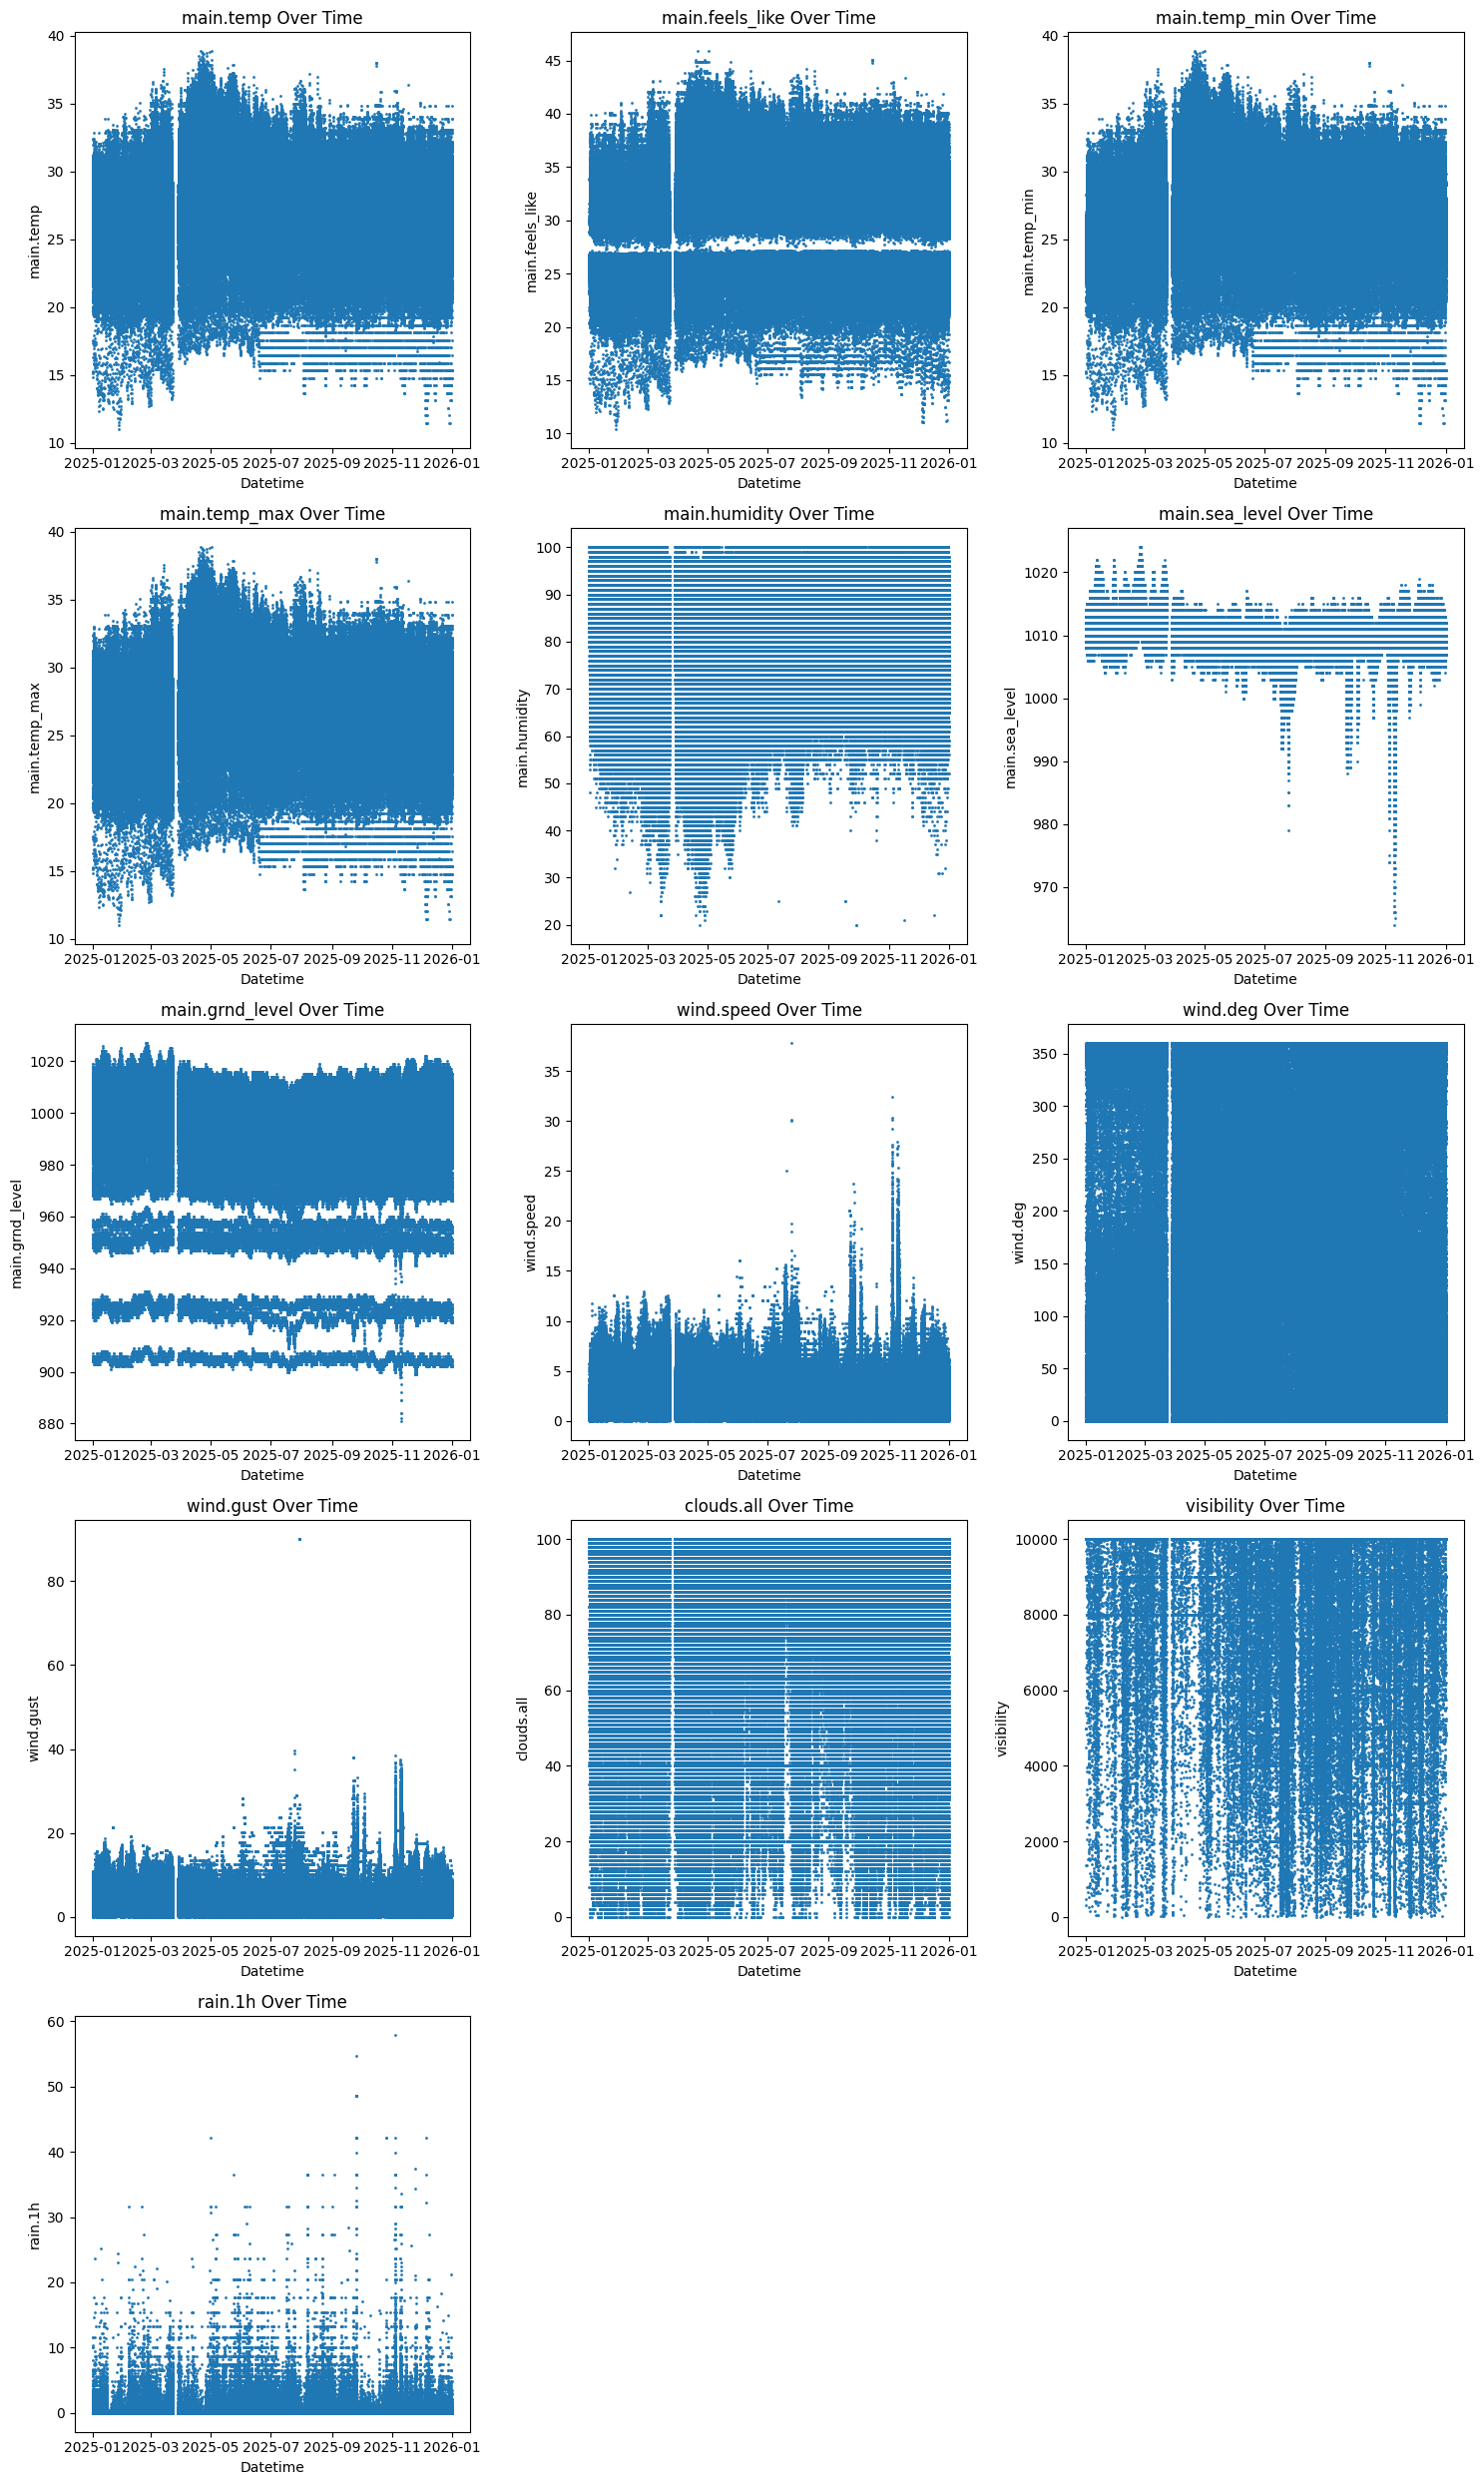

In [36]:
num_plots = len(weather_signal_labels)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(weather_signal_labels):
    if i < num_plots:
        axes[i].scatter(weather_dataframe['datetime'], weather_dataframe[col], s=1)
        axes[i].set_title(f'{col} Over Time')
        axes[i].set_xlabel('Datetime')
        axes[i].set_ylabel(col)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As seen from the scatter plots, all the graphs don't have any unreasonable outliers. Though there are some that are relatively higher than others, they are still within the upper boundaries of what is feasible.

We can do further checking to try and see more outliers within relationships of multiple variables.



---



### Relational Outliers




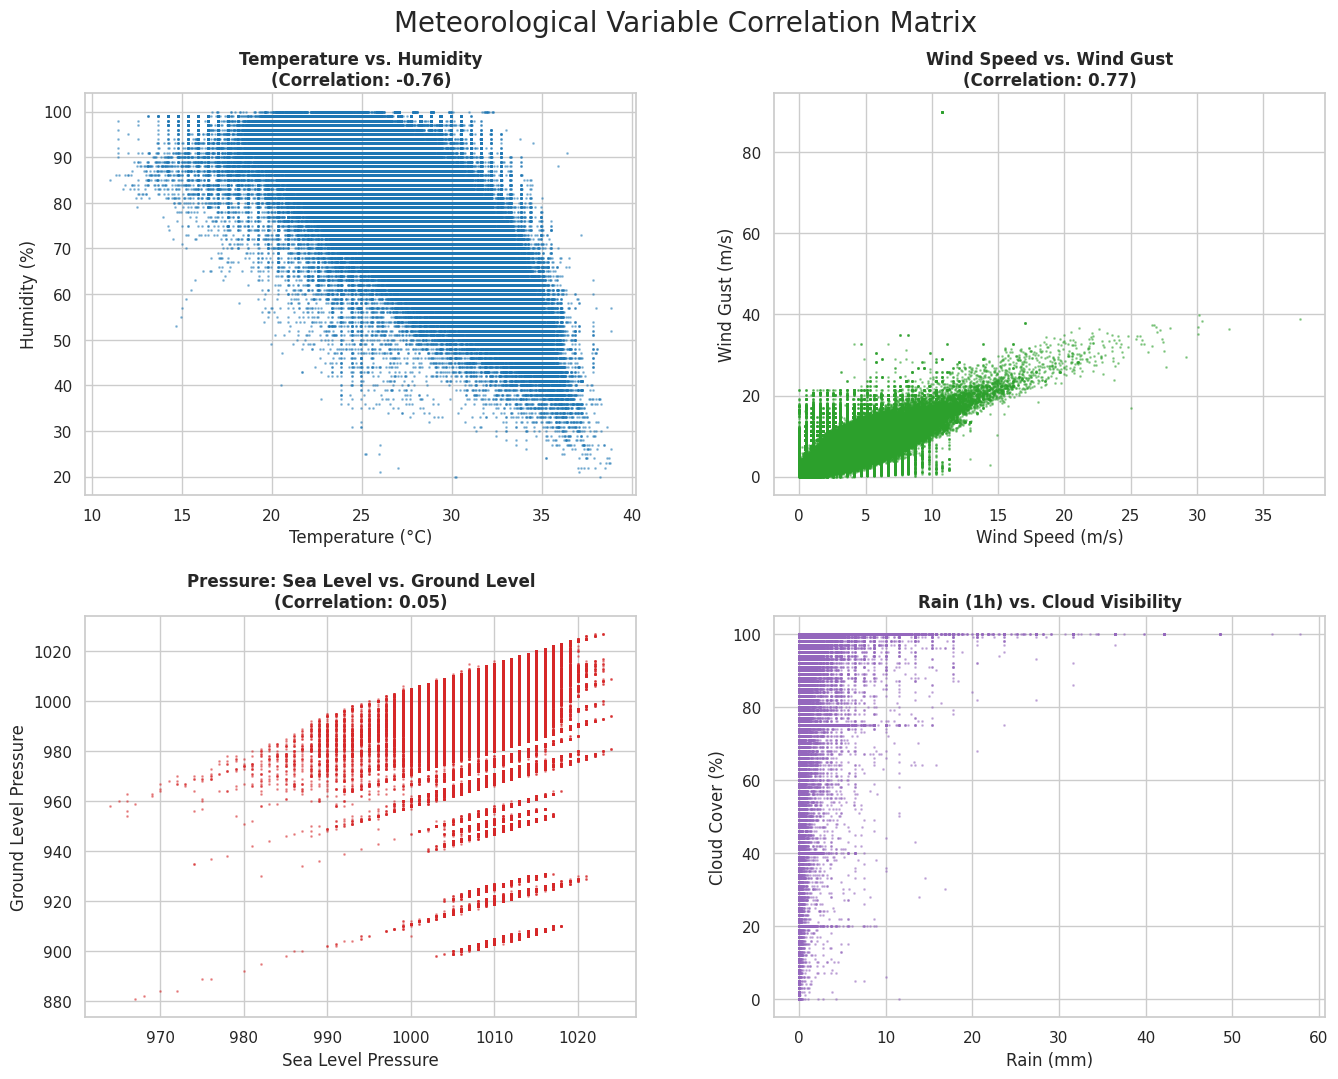

In [37]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.25)

ax1 = axes[0, 0]
corr_temp_hum = weather_dataframe['main.temp'].corr(weather_dataframe['main.humidity'])
ax1.scatter(weather_dataframe['main.temp'], weather_dataframe['main.humidity'], s=1, alpha=0.4, color='tab:blue')
ax1.set_title(f'Temperature vs. Humidity\n(Correlation: {corr_temp_hum:.2f})', fontweight='bold')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Humidity (%)')

ax2 = axes[0, 1]
corr_wind = weather_dataframe['wind.speed'].corr(weather_dataframe['wind.gust'])
ax2.scatter(weather_dataframe['wind.speed'], weather_dataframe['wind.gust'], s=1, alpha=0.4, color='tab:green')
ax2.set_title(f'Wind Speed vs. Wind Gust\n(Correlation: {corr_wind:.2f})', fontweight='bold')
ax2.set_xlabel('Wind Speed (m/s)')
ax2.set_ylabel('Wind Gust (m/s)')

ax3 = axes[1, 0]
corr_press = weather_dataframe['main.sea_level'].corr(weather_dataframe['main.grnd_level'])
ax3.scatter(weather_dataframe['main.sea_level'], weather_dataframe['main.grnd_level'], s=1, alpha=0.4, color='tab:red')
ax3.set_title(f'Pressure: Sea Level vs. Ground Level\n(Correlation: {corr_press:.2f})', fontweight='bold')
ax3.set_xlabel('Sea Level Pressure')
ax3.set_ylabel('Ground Level Pressure')

ax4 = axes[1, 1]
ax4.scatter(weather_dataframe['rain.1h'], weather_dataframe['clouds.all'], s=1, alpha=0.4, color='tab:purple')
ax4.set_title('Rain (1h) vs. Cloud Visibility', fontweight='bold')
ax4.set_xlabel('Rain (mm)')
ax4.set_ylabel('Cloud Cover (%)')

plt.suptitle('Meteorological Variable Correlation Matrix', fontsize=20, y=0.95)
plt.show()

Temperature & Humidity
- Correlation (-0.76): This strong negative correlation is a textbook example of how Relative Humidity (RH) behaves.
- As temperature rises, the air's capacity for moisture increases exponentially. Therefore, the "relative" percentage naturally drops as the day warms up.

Wind Speed & Wind Gust
- Correlation (0.77): There is a strong positive linear relationship.
- Gusts are surges in the mean wind speed caused by friction or turbulence.

Sea Level vs. Ground Level
- Correlation (0.05): At first glance, this near-zero correlation is surprising because these two usually move in tandem.
- Looking at the scatter plot, there is a parallel relation, suggesting that the data comes from multiple locations at different altitudes.

Rain vs. Cloud Cover
- This plot is heavily weighted toward the left (0mm rain) and the top (high cloud cover).
- This relationship also isn't linear.

In [38]:
sea = weather_dataframe['main.sea_level'].dropna()

Q1_sea = sea.quantile(0.25)
Q3_sea = sea.quantile(0.75)
IQR_sea = Q3_sea - Q1_sea

lower_sea = Q1_sea - 1.5 * IQR_sea
upper_sea = Q3_sea + 1.5 * IQR_sea

sea_outliers = sea[(sea < lower_sea) | (sea > upper_sea)]

print("SEA LEVEL")
print("Lower Bound:", lower_sea)
print("Upper Bound:", upper_sea)
print("Outliers:", len(sea_outliers))

ground = weather_dataframe['main.grnd_level'].dropna()

Q1_ground = ground.quantile(0.25)
Q3_ground = ground.quantile(0.75)
IQR_ground = Q3_ground - Q1_ground

lower_ground = Q1_ground - 1.5 * IQR_ground
upper_ground = Q3_ground + 1.5 * IQR_ground

ground_outliers = ground[(ground < lower_ground) | (ground > upper_ground)]

print("\nGROUND LEVEL")
print("Lower Bound:", lower_ground)
print("Upper Bound:", upper_ground)
print("Outliers:", len(ground_outliers))

SEA LEVEL
Lower Bound: 1003.5
Upper Bound: 1015.5
Outliers: 39583

GROUND LEVEL
Lower Bound: 970.0
Upper Bound: 1026.0
Outliers: 58192


Using the Interquartile Range (IQR) method, sea-level pressure values below 1003.5 hPa and above 1015.5 hPa were classified as statistical outliers.
Approximately 39,583 observations (~3–4%) fall outside this range.
These values likely represent natural atmospheric variability such as low-pressure systems and high-pressure systems rather than data errors.

----

# Data Analysis

----

## Feature Engineering

To enhance the analytical value of the dataset, several derived features were created. These features capture relationships between raw weather variables and allow deeper exploration of the weather.

The first feature that will be derived is temperature range. This measures intra-period thermal variability, reflecting atmospheric stability and radiative conditions.

In [39]:
weather_dataframe['temp_range'] = abs(
    weather_dataframe['main.temp_max'] -
    weather_dataframe['main.temp_min']
)

weather_dataframe['temp_range_bins'] = pd.cut(weather_dataframe['temp_range'], bins=4)

weather_dataframe['temp_range_bins'].value_counts()

,count
temp_range_bins,
"(-0.00665, 1.663]",1026768
"(1.663, 3.325]",39259
"(3.325, 4.988]",563
"(4.988, 6.65]",37


We can see here that around 96% of records lie below the 1.66 C range, implying that most days have a very low intra-period temperature variability. This also means that the temperature range is heavily skewed to the right.

Within the Philippine context, this suggests that there is a stable tropical climate, aligning with the Philippines' climate.

----

The next feature to be created is the elevation, which takes the difference between sea and ground pressure. The higher the value, the higher the altitude of the city is. The estimated altitude in meters was also derived from elevation proxy.

In [40]:
weather_dataframe['elevation_proxy'] = (
    weather_dataframe['main.sea_level'] -
    weather_dataframe['main.grnd_level']
)

weather_dataframe['estimated_altitude_m'] = weather_dataframe['elevation_proxy'] * 8.5

Atmospheric pressure decreases with elevation. Therefore, the larger the sea-level to the ground pressure, the higher the higher elevation.

----

Next, we'll create a wind consistency column to determine the ratio of wind gust to wind speed. It represents how much instantaneous gusts deviate from sustained wind.

In [41]:
weather_dataframe['wind_consistency'] = (
  weather_dataframe['wind.gust'] / weather_dataframe['wind.speed']
)
weather_dataframe[
    (weather_dataframe['wind_consistency'] == 0) |
    (weather_dataframe['wind_consistency'] > 5)
][['wind.gust', 'wind.speed', 'wind_consistency']].tail()

,wind.gust,wind.speed,wind_consistency
1066553,2.68,0.51,5.254902
1066558,1.91,0.00,inf
1066579,1.45,0.00,inf
1066585,3.46,0.51,6.784314
1066601,3.46,0.51,6.784314


Since there are some wind.speed values what that less than 1 m/s and are shown as 0, it will result in an infinite value. Division by very small wind speeds can artificially inflate this ratio as well. As such, the wind consistency for cases of 1 m/s wind speed or 80 m/s wind gust will be set to 0.


In [42]:
weather_dataframe.loc[((weather_dataframe['wind.gust'] > 80) | (weather_dataframe['wind.speed'] < 1)), 'wind_consistency'] = 0

weather_dataframe['wind_consistency_bins'] = pd.cut(weather_dataframe['wind_consistency'], bins=4)
weather_dataframe['wind_consistency_bins'].value_counts()

,count
wind_consistency_bins,
"(-0.0208, 5.209]",1052938
"(5.209, 10.417]",11734
"(10.417, 15.626]",1633
"(15.626, 20.835]",322


Once the consistency has been binned, we can see some consistency of 10 and above.

For this, we can explain these as extreme or turbulent bursts of wind.

- Stable/Standard (0.0 - 5.2): Typical breeze or calm conditions.
- Turbulent (5.2 - 10.4): Moderate gustiness, likely during weather changes.
- Anomalous/Extreme (10.4+): Sudden bursts or potential sensor noise.

----

Lastly, we'll create heat index. Heat Index estimates perceived human temperature, incorporating humidity. The function below does a simple approximation of temperature along with humidity.

In [43]:
def calculate_heat_index(row):
    T = row['main.temp']
    R = row['main.humidity']
    if T < 27:
        return T
    return -8.784 + 1.611*T + 2.338*R - 0.146*T*R - 0.0123*T**2 - 0.0164*R**2 + 0.0022*T**2*R + 0.000725*T*R**2 - 0.0000035*T**2*R**2

weather_dataframe['main.heat_index'] = weather_dataframe.apply(calculate_heat_index, axis=1)

weather_dataframe['main.heat_index_bins'] = pd.cut(weather_dataframe['main.heat_index'], bins=4)
weather_dataframe['main.heat_index_bins'].value_counts()

,count
main.heat_index_bins,
"(26.367, 41.694]",605235
"(10.979, 26.367]",447682
"(41.694, 57.021]",13701
"(57.021, 72.348]",9


The resulting binned result shows some cases of high heat index in some cases, but there are extreme cases, which could be interpreted as a result of a temperature surge. These likely represent local heat waves or specific tropical humidity spikes.

----

## Geographic Validation

In this next phase, we looked into the correlation between sea and ground level pressure (0.05). By calculating an Elevation Proxy, we revealed that the dataset contains several distinct geographical "bands," each representing cities at different altitudes.

In [44]:
city_stats = weather_dataframe.groupby('city_name')['elevation_proxy'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
highest_city = city_stats.index[0]
highest_value = city_stats['mean'].iloc[0]

print(f"Analysis Complete:")
print(f"The highest city in your dataset is: {highest_city}")
print(f"Average Pressure Delta: {highest_value:.2f} hPa")
print("-" * 30)
print("Top 5 Highest Cities:")
print(city_stats.head(5))

Analysis Complete:
The highest city in your dataset is: Malaybalay
Average Pressure Delta: 106.49 hPa
------------------------------
Top 5 Highest Cities:
                    mean  count
city_name                      
Malaybalay    106.492105   7726
Baguio         89.977495   7465
Marawi         84.552853   7852
Gingoog City   61.849968   7785
Kidapawan      58.264770   7769


Identification of Highest Altitudes: Through pressure delta analysis ($P_{sea} - P_{ground}$), Malaybalay was identified as the highest-elevation city in the dataset with an average delta of 106.49 hPa.

Next, I looked into Malaybalay's estimated altitude and saw that it had an estimated altitude of 905.18 meters above its sea level.

In [45]:

malaybalay_alt = weather_dataframe[weather_dataframe['city_name'] == 'Malaybalay']['estimated_altitude_m'].mean()
print(f"Estimated Altitude of Malaybalay: {malaybalay_alt:.2f} meters")

Estimated Altitude of Malaybalay: 905.18 meters


And since we're currently looking into cities, I compared the thermodynamic behavior of a high-altitude city (Malaybalay) against a city like Manila:

In [46]:
highest_city_df = weather_dataframe[weather_dataframe['city_name'] == 'Malaybalay']
manila_city_df = weather_dataframe[weather_dataframe['city_name'] == 'Manila']

print(f"Malaybalay Temp/Hum Correlation: {highest_city_df['main.temp'].corr(highest_city_df['main.humidity']):.2f}")
print(f"Manila Temp/Hum Correlation: {manila_city_df['main.temp'].corr(manila_city_df['main.humidity']):.2f}")

Malaybalay Temp/Hum Correlation: -0.87
Manila Temp/Hum Correlation: -0.82


The inverse relationship between temperature and humidity within Manila and Malaybalay is a robust constant relationship in this dataset, consistent regardless of significant changes in elevation.
----

## Diurnal & Rain

Next step, I'll look into how day and night periods affect weather patterns and conditions.

By using the sys.sunrise and sys.sunset timestamps, we categorized over 1 million records into Day and Night periods to observe how solar radiation influences atmospheric stability.

/tmp/ipython-input-1089687351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=weather_dataframe, x='is_day', y='wind_consistency', inner="quartile", palette="Set2")


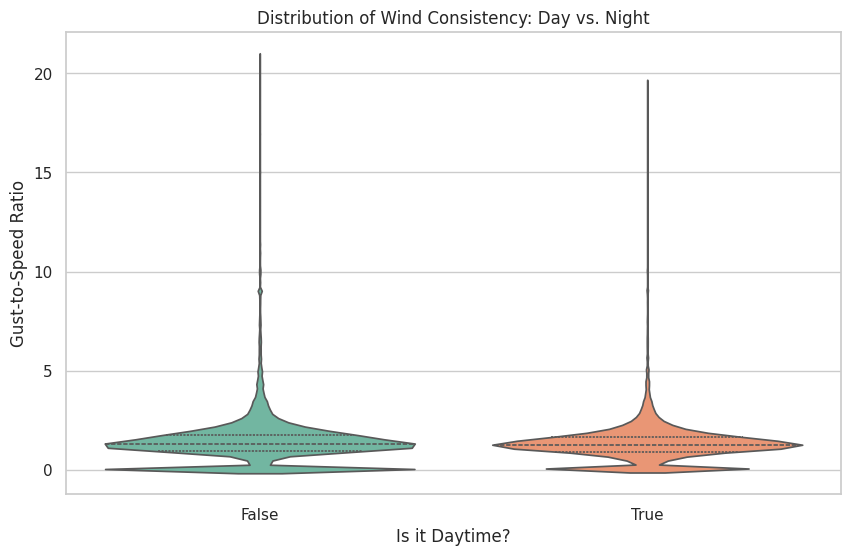

In [47]:
weather_dataframe['is_day'] = (weather_dataframe['datetime'] > weather_dataframe['sys.sunrise']) & \
                              (weather_dataframe['datetime'] < weather_dataframe['sys.sunset'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=weather_dataframe, x='is_day', y='wind_consistency', inner="quartile", palette="Set2")
plt.title('Distribution of Wind Consistency: Day vs. Night')
plt.ylabel('Gust-to-Speed Ratio')
plt.xlabel('Is it Daytime?')
plt.show()

The violin plot reveals that while the majority of wind remains stable, the Daytime period shows a slightly wider distribution of higher "Gust-to-Speed" ratios.

This increased volatility during the day can be explained by solar-induced convection. As the sun heats the Earth's surface, rising air creates vertical mixing, which manifests as more frequent and intense wind gusts compared to the calmer, more stratified night air.

Despite the extremities, both periods maintain a heavy concentration near a gust-to-speed ratio of 1.0, indicating that steady wind is the baseline state regardless of the hour.

Precipitation is a non-linear event. To understand what actually triggers rain, we filtered the dataset to isolate only active "Rain Events" (rain.1h > 0).

In [48]:
rainy_only = weather_dataframe[weather_dataframe['rain.1h'] > 0]

min_hum = rainy_only['main.humidity'].min()
min_clouds = rainy_only['clouds.all'].min()

print(f"In this dataset, rain never occurs below {min_hum}% humidity.")
print(f"In this dataset, rain never occurs below {min_clouds}% cloud cover.")

In this dataset, rain never occurs below 25.0% humidity.
In this dataset, rain never occurs below 0.0% cloud cover.


Through this filtering, we identified the specific atmospheric "gatekeepers" required for rain in this region:
- Humidity Floor: In this dataset, rain never occurs below a 25.0% humidity, which is the  minimum moisture saturation required for raindrops to reach the ground without evaporating.
- Cloud Minimum: The data also shows that rain occurs even if there are no clouds. While rare, this indicates "sun showers" or localized rain from small, opaque clouds that may not be visible to sensors used to gather data.

-----

## Rain Prediction Prep

In this next feature analysis, the goal is to identify the statistical thresholds of humidity and cloud cover that differentiate "Rain" from "No Rain" events.

/tmp/ipython-input-512138512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_dataframe, x='has_rain', y='main.humidity', ax=ax1, palette='Blues')
/tmp/ipython-input-512138512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_dataframe, x='has_rain', y='clouds.all', ax=ax2, palette='Purples')


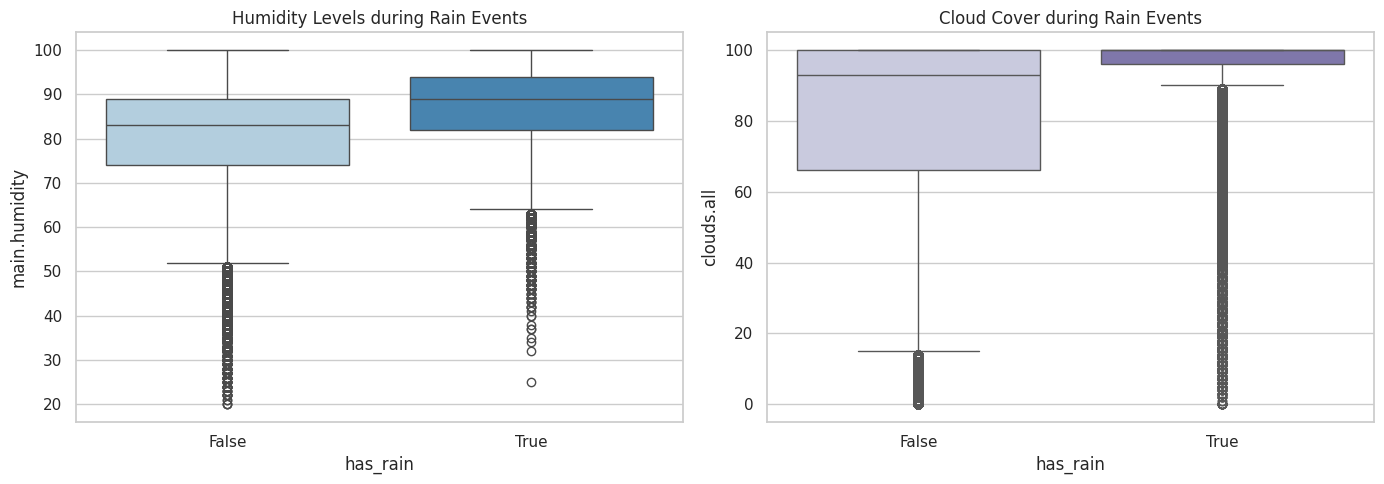

In [49]:
weather_dataframe['has_rain'] = weather_dataframe['rain.1h'] > 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=weather_dataframe, x='has_rain', y='main.humidity', ax=ax1, palette='Blues')
ax1.set_title('Humidity Levels during Rain Events')

sns.boxplot(data=weather_dataframe, x='has_rain', y='clouds.all', ax=ax2, palette='Purples')
ax2.set_title('Cloud Cover during Rain Events')

plt.tight_layout()
plt.show()

These boxplots provide a visual status for when it actually rains in and when it doesn't.

Humidity Levels
- When has_rain is True, the boxplot is more upward than False. The median humidity during rain events is roughly 90%, compared to about 83% on dry days.
- The whiskers for the True category are also much higher. This is an indicator from the previous information, where rain never occurs below 25.0% humidity, whereas dry days can drop as low as 20% or less.
- Overall, when you have high humidity, you can have rain occur. Rain occurs when there is a high humidity.

Cloud Cover
- The plot on the right highlights cloud cover's correlation with rain.
- The box for rain events is almost entirely  at the top of the graph. You can see a long trail of records stretching all the way down to 0%. This may be due to rain being measured over an hour and clouds are a snapshot, meaning that some records could've had rain occur while the sky was clear.
- When it isn't raining (False), the median cloud cover is still quite high (above 90%). This shows that having having clouds doesn't guarantee rain.

----

In [50]:
rain_stats = weather_dataframe.groupby('has_rain')[['main.humidity', 'clouds.all']].mean()

print("Average Conditions: No Rain vs. Rain")
print(rain_stats)

high_cloud_rain_prob = weather_dataframe[weather_dataframe['clouds.all'] == 100]['has_rain'].mean()
print(f"\nProbability of rain when cloud cover is 100%: {high_cloud_rain_prob:.2%}")

Average Conditions: No Rain vs. Rain
          main.humidity  clouds.all
has_rain                           
False         80.908539   78.127245
True          86.812129   93.000443

Probability of rain when cloud cover is 100%: 13.09%


When checking, the occurence of rain usually occurs between 82% and 94% humidity. Any reading below 25% serves as a definitive "no-rain" rule for predictive models.

Clouds also act act as a Potential Threshold. Rain is highly correlated with 100% cloud cover, but the density of overcast days without rain ('False') suggests that cloud cover alone is not enough to trigger precipitation; high moisture or humidity must also be present.

----

## Correlation Heatmap

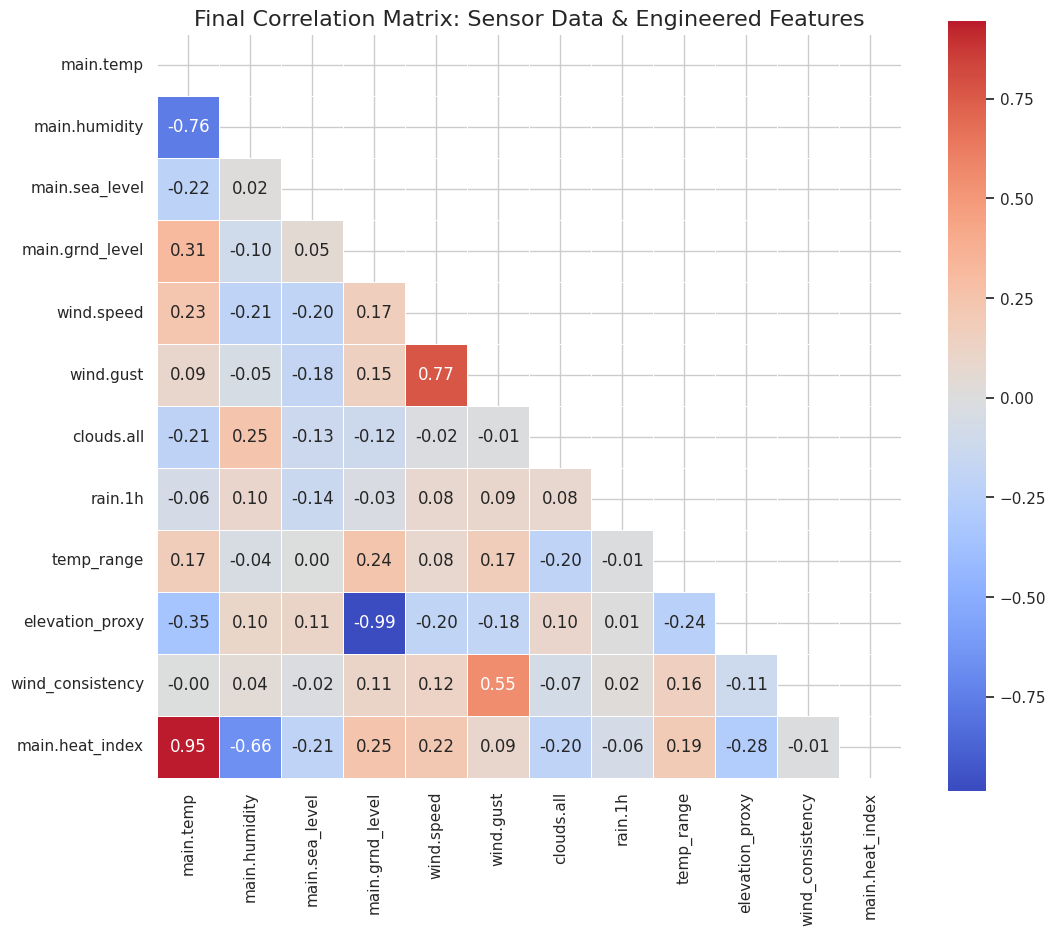

In [51]:
cols_to_corr = [
    'main.temp', 'main.humidity', 'main.sea_level',
    'main.grnd_level', 'wind.speed', 'wind.gust', 'clouds.all',
    'rain.1h', 'temp_range', 'elevation_proxy', 'wind_consistency', 'main.heat_index'
]

corr_matrix = weather_dataframe[cols_to_corr].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    square=True
)

plt.title('Final Correlation Matrix: Sensor Data & Engineered Features', fontsize=16)
plt.show()

1. Correlation Matrix
- The correlation matrix provides a high-level view of how the weather variables interact with each other.
  - Temperature & Heat Index ($+0.95$): As expected, temperature is the primary driver of the Heat Index, but the slightly lower-than-perfect correlation may be due to humidity having an influence.
  - The Pressure-Elevation Link ($-0.99$): The near-perfect negative correlation between main.grnd_level and elevation_proxy validates our geographic profiling. As the pressure difference increases, the ground-level pressure drops,  reflecting higher altitudes.
  - Wind Speed vs. Gust ($+0.77$): While strongly related, the variance shows where local turbulence or storm activity creates sudden surges that deviate from sustained wind speeds.

2. Geospatial Validation
- We transformed a messy global pressure correlation of $0.05$ into distinct, linear elevation profiles.
  - Our analysis pinpointed Malaybalay as the highest city in the dataset, with a pressure delta of 106.49 hPa and altitude of 905.18 meters.
  - Comparing Malaybalay to Manila showed that the inverse relationship between temperature and humidity remains consistent constant across different elevations, maintaining strong negative correlations around $-0.82$ and $-0.87$.

3. Wind & Rain
- We identified critical conditions for weather events to occur:
  - Rain events are constrained by a moisture limit. In this dataset, rain never occurs below 25.0% humidity, and median humidity during rain jumps significantly to nearly 90%.
  - While $98.8\%$ of the wind data is stable, there are 322 extreme events where gusts were more than 15.6 times stronger than sustained speeds, likely representing convective gust fronts or localized microbursts.
  - Our Heat Index binning successfully flagged 13,701 records in the "Danger Zone" ($>41.7°C$), providing a safety metric that wasn't captured by raw data.
----

# Data Prediction

----

## Model Definition

For this section, we are going to simply try to make a predictive model using the data we've gathered, transformed, and enriched.

I will be using a simple Random Forest model to predict the chances of rain. First, let us use a graph to determine feature importance when it comes to predicting rain. Let us first import the necessary libraries.

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

Next, let us split the columns as necessary, and only take in columns that are numerical and those we derived earlier.

In [101]:
x_columns_clean = [
    'visibility', 'main.temp', 'main.humidity', 'main.sea_level',
    'main.grnd_level', 'wind.speed', 'wind.deg', 'wind.gust',
    'clouds.all', 'temp_range', 'elevation_proxy', 'main.heat_index', 'is_day'
]

X = weather_dataframe[x_columns_clean]
y = weather_dataframe['has_rain']

In [106]:
X.shape

(1066627, 13)

Next, let us run a sample model and display the confusion matrix. Let's use a small Random Forest.

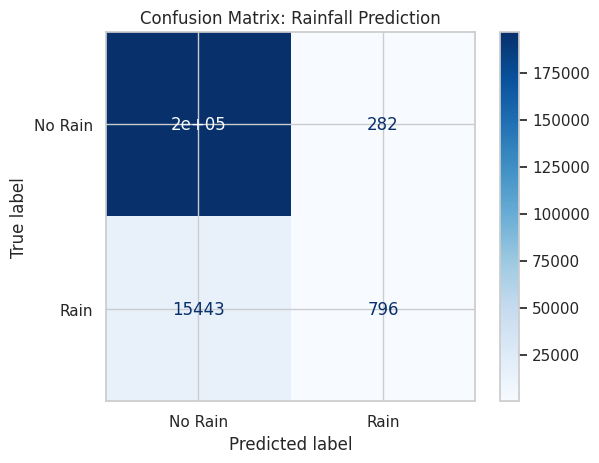

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=67)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=67)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Rainfall Prediction")
plt.show()

In [105]:
cm

array([[196805,    282],
       [ 15443,    796]])

Now, this confusion matrix shows that we've discovered around 197,601, showing a 92.6% accuracy rate, but we mostly missed rain events, and is mostly predicting no rain. The count of rain and no rain is also very heavily imbalanced, leaning towards no rain, which could suggest why the model is failing to learn these classes.

-----

With that said, we can run a Stratified K-Fold validation technique to determine proper metrics, as seen below.

In [100]:
rus = RandomUnderSampler(random_state=67)
X_resampled, y_resampled = rus.fit_resample(X, y)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=67)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=67)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

print(f"Realistic Mean F1 Score: {cv_results['test_f1'].mean():.4f}")
print(f"Realistic Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Realistic Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Realistic Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")

Realistic Mean F1 Score: 0.6933
Realistic Mean Recall: 0.6791
Realistic Mean Precision: 0.7082
Realistic Mean Accuracy: 0.6996


After applying RandomUnderSampler to address class imbalance and evaluating the model using 5-fold Stratified Cross-Validation, the model achieved the following average scores:
- Accuracy: 0.6996 (~70%)
- Precision: 0.7082 (~71%)
- Recall: 0.6791 (~68%)
- F1 Score: 0.6933 (~69%)

----



## Interpretation

- The model demonstrates balanced performance between precision and recall, as reflected in the F1 score (~69%).
- A precision of 71% means that the model predicts rain 7 out of 10 times.
- A recall of 68% means the model detects about two-thirds of actual rain events.
- The 70% accuracy reflects realistic performance after correcting for class imbalance.

Overall, the model performs significantly better at detecting rain compared to the initial imbalanced approach and provides a solid baseline for further optimization.

----

## Recommendation

Check for rain.1h

Use better models rather than RFA

In [109]:
weather_dataframe['rain.1h'].value_counts()

,count
rain.1h,
0.00,985433
0.12,2727
0.13,2378
0.15,2187
0.10,2152
...,...
2.48,1
14.61,1
14.65,1
